Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1) Load your zillow dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as w
import evaluate as ev

In [2]:
#Wrangling and splitting data

zillow = w.wrangle_zillow()
train, validate, test = w.split_data(zillow)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259965 entries, 1605523 to 880131
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        1259965 non-null  int64  
 1   bathrooms       1259965 non-null  float64
 2   sqft            1259965 non-null  int64  
 3   value           1259965 non-null  int64  
 4   yearbuilt       1259965 non-null  int64  
 5   taxamount       1259965 non-null  int64  
 6   county          1259965 non-null  object 
 7   county_Orange   1259965 non-null  uint8  
 8   county_Ventura  1259965 non-null  uint8  
dtypes: float64(1), int64(5), object(1), uint8(2)
memory usage: 79.3+ MB


2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```

Modify and add to the code above as necessary for it to work with the zillow dataset.

In [4]:
from sklearn.linear_model import LinearRegression

X = train[['sqft']]
y = train.value

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [5]:
predictions[:5]

array([291444.03720435, 858046.28291374, 351483.08250659, 355901.54038597,
       317434.96590662])

3) Plot the residuals for the linear regression model that you made.

In [6]:
#Creating a new column for my predictions

train['predictions'] = predictions

In [7]:
#Another new column for my residuals

train['residuals'] = train.predictions - train.value

In [8]:
#Checking head to make sure they're there

train.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county,county_Orange,county_Ventura,predictions,residuals
1605523,3,2.0,1349,324947,1951,4010,LA,0,0,291444.037204,-33502.962796
2065812,4,3.5,3529,1368175,1977,14715,Orange,1,0,858046.282914,-510128.717086
1126554,5,3.0,1580,191284,1963,2590,LA,0,0,351483.082507,160199.082507
1438785,3,2.0,1597,148537,1962,2046,LA,0,0,355901.540386,207364.540386
1472747,4,2.0,1449,240187,1954,2857,Orange,1,0,317434.965907,77247.965907


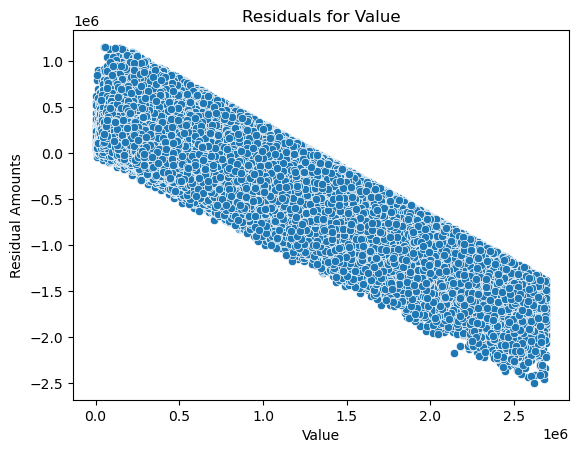

In [9]:
#Commence the plotting

sns.scatterplot(data=train, x='value', y='residuals')
plt.xlabel('Value')
plt.ylabel('Residual Amounts')
plt.title('Residuals for Value')
plt.show()

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
#SSE for model

SSE_model = (train.residuals ** 2).sum()
print(f'SSE for model = {SSE_model}')

SSE for model = 9.771259162767163e+16


In [11]:
#ESS for model

ESS_model = sum((train.predictions - train.value.mean())**2)
print(f'ESS for model = {ESS_model}')

ESS for model = 4.9998917345761496e+16


In [12]:
#TSS for model

TSS_model = ESS_model + SSE_model
print(f'TSS for model = {TSS_model}')

TSS for model = 1.4771150897343312e+17


In [13]:
#MSE for model

MSE_model = SSE_model / len(train)
print(f'MSE for model = {MSE_model}')

MSE for model = 77551830112.4806


In [14]:
#RMSE for model

RMSE_model = MSE_model ** 0.5
print(f'RMSE for model = {RMSE_model}')

RMSE for model = 278481.2922127456


5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [15]:
#Set the baseline

baseline = train.value.mean()
train['baseline'] = baseline

In [16]:
#Check

train.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county,county_Orange,county_Ventura,predictions,residuals,baseline
1605523,3,2.0,1349,324947,1951,4010,LA,0,0,291444.037204,-33502.962796,408353.937845
2065812,4,3.5,3529,1368175,1977,14715,Orange,1,0,858046.282914,-510128.717086,408353.937845
1126554,5,3.0,1580,191284,1963,2590,LA,0,0,351483.082507,160199.082507,408353.937845
1438785,3,2.0,1597,148537,1962,2046,LA,0,0,355901.540386,207364.540386,408353.937845
1472747,4,2.0,1449,240187,1954,2857,Orange,1,0,317434.965907,77247.965907,408353.937845


In [17]:
#SSE for baseline

train['baseline_residuals'] = train.baseline - train.value

SSE_baseline = (train.baseline_residuals ** 2).sum()
print(f'SSE for baseline = {SSE_baseline}')

SSE for baseline = 1.477115089734625e+17


In [18]:
#MSE for baseline

MSE_baseline = SSE_baseline / len(train)
print(f'MSE for baseline = {MSE_baseline}')

MSE for baseline = 117234612845.16832


In [19]:
#RMSE for baseline

RMSE_baseline = MSE_baseline ** 0.5
print(f'RMSE for baseline = {RMSE_baseline}')

RMSE for baseline = 342395.4042407233


6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
print(f'The SSE for the model is: {SSE_model}')
print(f'The SSE for the baseline is: {SSE_baseline}')
if SSE_model < SSE_baseline:
    print('The model outperforms the baseline.')
else:
    print('The model did not perform better than the baseline.')

The SSE for the model is: 9.771259162767163e+16
The SSE for the baseline is: 1.477115089734625e+17
The model outperforms the baseline.


7) What is the amount of variance explained in your model?

Going to find the amount of variance using several different methods.

In [21]:
#Semi-manual calculation

ESS_model / TSS_model

0.33849032951626085

In [22]:
#Using r2_score function

from sklearn.metrics import r2_score

r2_score(train.value, train.predictions)

0.33849032951639235

In [23]:
#Using explained_variance_score function

from sklearn.metrics import explained_variance_score

explained_variance_score(train.value, train.predictions)

0.33849032951639235

Happy to see they all have the same result.

8) Is your model better than the baseline model?

Yes, oBvIoUsLy.

9) Create a file named ```evaluate.py``` that contains the following functions.

- ```plot_residuals(y, yhat)```: creates a residual plot
- ```regression_errors(y, yhat)```: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
- ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

Functions were created in evaluate.py file. Notebook has been restarted and evaluate file has been imported at the top and run through in the following cells for testing.

In [24]:
y = train.value
yhat = train.predictions

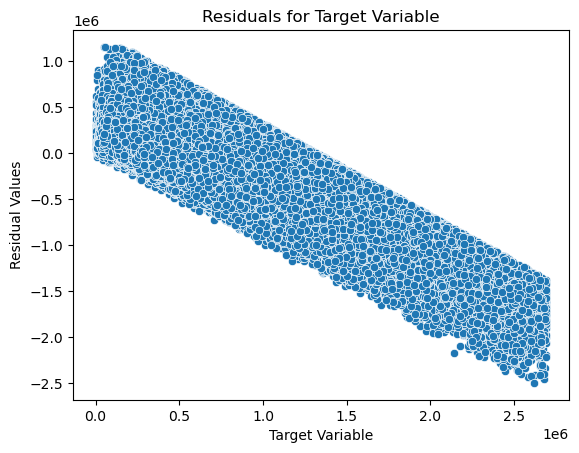

In [25]:
ev.plot_residuals(y, yhat)

In [26]:
ev.regression_errors(y, yhat)

SSE for model = 9.771259162767163e+16
ESS for model = 4.9998917345761496e+16
TSS for model = 1.4771150897343312e+17
MSE for model = 77551830112.4806
RMSE for model = 278481.2922127456


In [27]:
ev.baseline_mean_errors(y)

SSE for baseline = 1.477115089734625e+17
MSE for baseline = 117234612845.16832
RMSE for baseline = 342395.4042407233


In [28]:
ev.better_than_baseline(y, yhat)

The SSE for the model is: 9.771259162767163e+16
The SSE for the baseline is: 1.477115089734625e+17
The model outperforms the baseline.


True